In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sys import path
path.append('./../spineSimulator/')
#import spineSimulator
import FiniteDifferenceSolver
import plot
from importlib import reload
reload(FiniteDifferenceSolver)
reload(plot)

<module 'plot' from '/home/work/Projects/spineCableSimulation/code/notebooks/./../spineSimulator/plot.py'>

In [4]:
# x-grid
L = 1.e-6
nh, nhnj, nn, nndj, nd = 4, 1, 4, 1, 4
nx = nh + nhnj + nn + nndj + nd
x = np.linspace(0,L,nx)

# t-grid
T = 0.1e-3
timestep = 1.e-11  # use 100 picoseconds for explicit solver
nt = int(T/timestep)
t = np.linspace(0., T, nt+1)
print('timesteps {nt}'.format(nt=nt))

# spine shape
ah, an, ad = 250.e-9, 50.e-9, 400.e-9 
a = np.zeros(nx)
a[:nh]=ah
a[nh+nhnj:nh+nhnj+nn] = an
a[nh+nhnj+nn+nndj: nh+nhnj+nn+nndj+nd] = ad
a[nh:nh+nhnj]= np.linspace(ah, an, nhnj+2, endpoint=True)[1:-1]
a[nh+nhnj+nn : nh+nhnj+nn+nndj] = np.linspace(an, ad, nndj+2, endpoint=True)[1:-1]

timesteps 10000000


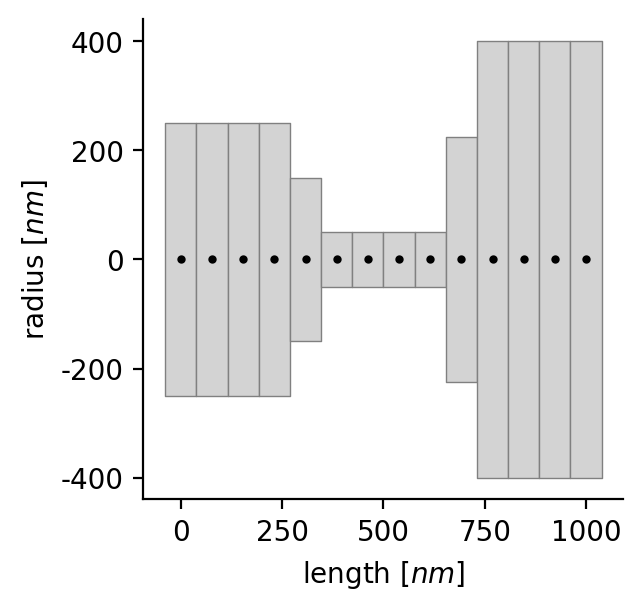

In [12]:
reload(plot)
fig = plt.figure(dpi=200, figsize=(3,3))
pos = [0.1,0.1,0.8,0.8]
plot.x_grid_on_spine(fig, pos, x, a)

In [19]:
?ax.annotate

In [5]:
# text rendering with LaTex
plt.rc('text', usetex=True)
plt.rc('font', family='sans')



(-0.4, 0.4)

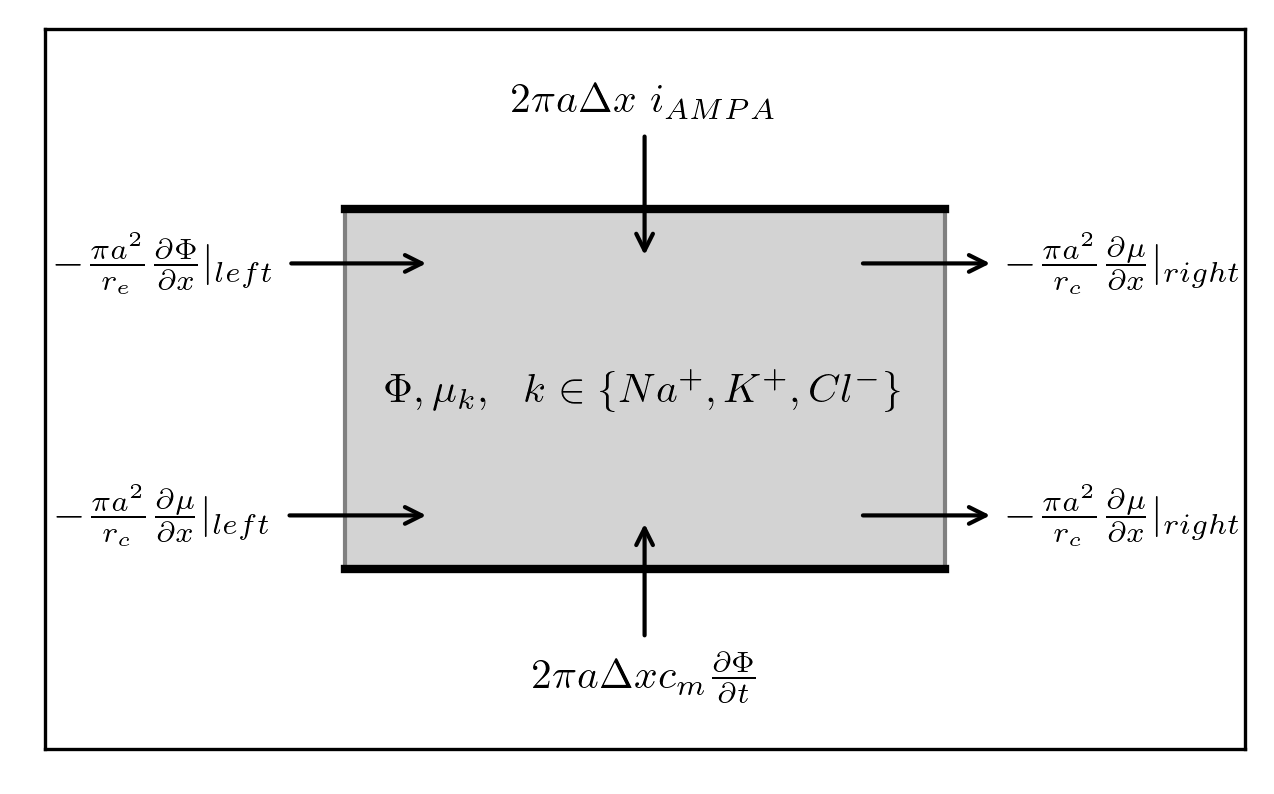

In [52]:


fig = plt.figure(facecolor='white', dpi=300, figsize=(5,3))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.set_xticks([])
ax.set_yticks([])


l = 0.6
h = 0.4

ax.fill_between([-l/2., l/2.],[-h/2.,-h/2.], [h/2., h/2.], facecolor='lightgrey', edgecolor='gray')
ax.plot([-l/2., l/2.],[-h/2.,-h/2.], 'k-', lw=2.)
ax.plot([-l/2., l/2.],[h/2.,h/2.], 'k-', lw=2.)


ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, -h/2*0.7), xytext=(-l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_e}\frac{\partial \Phi}{\partial x }|_{left}$", 
            xy=(-l/2*0.7, h/2*0.7), xytext=(-l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu}{\partial x }|_{right}$", 
            xy=(l/2*0.7, h/2*0.7), xytext=(l*0.8, h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$-\frac{\pi a^2}{r_c}\frac{\partial \mu}{\partial x }|_{right}$", 
            xy=(l/2*0.7, -h/2*0.7), xytext=(l*0.8, -h/2.*0.7), arrowprops=dict(arrowstyle="<-"), ha='center', va='center')

ax.annotate(r"$2 \pi a \Delta x c_m \frac{\partial \Phi}{\partial t }$", 
            xy=(0., -h/2.*0.7), xytext=(0., -0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.annotate(r"$2 \pi a \Delta x ~ i_{AMPA}$",
            xy=(0., h/2.*0.7), xytext=(0., 0.8*h), arrowprops=dict(arrowstyle="->"), ha='center', va='center')

ax.text(0., 0., '$\Phi, \mu_k, ~~k \in \{{Na^+},{K^+},{Cl^{-}}\}$', va='center', ha='center')

ax.set_xlim([-l,l])
ax.set_ylim([-h,h])


In [17]:
reload(FiniteDifferenceSolver)
#results_file = './../simulation_results/FD_10082022_test.pcl'
results_file = './../simulation_results/CapCharge_10psTimestep_1AMPAseg_11082022.pcl'
spine = FiniteDifferenceSolver.FiniteDifferenceSolver(t,x,a,results_file)

Writing results to file every 1000000 steps.
Writing results to file every 1e-05 seconds.
Writing results at 0.0 ms


In [18]:
spine.solve()

In [9]:
print('phi ', spine.phi)
print('c_Na ', spine.c_Na)
print('c_K ', spine.c_K)
print('c_Cl ', spine.c_Cl)
print('\n ################# \n')

print(spine.phi / spine.c_K)
print(spine.h_k('Na') / spine.g_k('Na') )
print(spine.alpha() / spine.beta_k('K') )
print(spine.gamma() / spine.delta_k('K') )
print(spine.gamma() / spine.delta_k('K') )
print('\n ################# \n')
##########
# STABILTY ANALYSIS
# all numbers have to be smaller 0.5
print(spine.const_q*spine.a/2*spine.gamma() * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.gamma() * spine.h_k('K')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.g_k('all')*spine.delta_t/spine.delta_x**2)
print(spine.delta_k('K') * spine.h_k('K')*spine.delta_t/spine.delta_x**2)

phi  [-70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70.
 -70. -70.]
c_Na  [6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022
 6.022 6.022 6.022 6.022]
c_K  [84.308 84.308 84.308 84.308 84.308 84.308 84.308 84.308 84.308 84.308
 84.308 84.308 84.308 84.308 84.308 84.308]
c_Cl  [6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022 6.022
 6.022 6.022 6.022 6.022]

 ################# 

[-0.83028894 -0.83028894 -0.83028894 -0.83028894 -0.83028894 -0.83028894
 -0.83028894 -0.83028894 -0.83028894 -0.83028894 -0.83028894 -0.83028894
 -0.83028894 -0.83028894 -0.83028894 -0.83028894]
[4.43764043 4.43764043 4.43764043 4.43764043 4.43764043 4.43764043
 4.43764043 4.43764043 4.43764043 4.43764043 4.43764043 4.43764043
 4.43764043 4.43764043 4.43764043 4.43764043]
[2002.5  2002.5  2002.5  2002.5  2002.5  1201.5   400.5   400.5   400.5
  400.5  1802.25 3204.   3204.   3204.   3204.   3204.  ]
[2002.5  2002.5  2002.5  2002.5  2002.5  1201.5   400.

In [10]:
import time
start = time.time()
for i in range(nt):
    spine.step_forward()
    if i%100000==0:
        print(i, ' of ', nt)
end = time.time()
print('time simulated [seconds]: ', T )
print('time taken {tsim} seconds for {nt} steps.'.format(nt=nt, tsim=end-start))
spine.save_results()

0  of  1000000
Writing results at 1e-05 ms
Writing results at 2e-05 ms
Writing results at 3.0000000000000004e-05 ms
Writing results at 4e-05 ms
Writing results at 4.9999999999999996e-05 ms
Writing results at 6.000000000000001e-05 ms
Writing results at 7.000000000000001e-05 ms
Writing results at 8e-05 ms
Writing results at 9e-05 ms
Writing results at 9.999999999999999e-05 ms
Writing results at 0.00011 ms
Writing results at 0.00012000000000000002 ms
Writing results at 0.00013000000000000002 ms
Writing results at 0.00014000000000000001 ms
Writing results at 0.00015000000000000001 ms
Writing results at 0.00016 ms
Writing results at 0.00017 ms
Writing results at 0.00018 ms
Writing results at 0.00019 ms
Writing results at 0.00019999999999999998 ms
Writing results at 0.00021000000000000004 ms
Writing results at 0.00022 ms
Writing results at 0.00023000000000000006 ms
Writing results at 0.00024000000000000003 ms
Writing results at 0.00025000000000000006 ms
Writing results at 0.00026000000000000

Writing results at 0.0021000000000000003 ms
Writing results at 0.0021100000000000003 ms
Writing results at 0.00212 ms
Writing results at 0.0021300000000000004 ms
Writing results at 0.0021400000000000004 ms
Writing results at 0.00215 ms
Writing results at 0.00216 ms
Writing results at 0.0021700000000000005 ms
Writing results at 0.0021800000000000005 ms
Writing results at 0.00219 ms
Writing results at 0.0022 ms
Writing results at 0.00221 ms
Writing results at 0.00222 ms
Writing results at 0.00223 ms
Writing results at 0.0022400000000000002 ms
Writing results at 0.0022500000000000003 ms
Writing results at 0.0022600000000000003 ms
Writing results at 0.0022700000000000003 ms
Writing results at 0.0022800000000000003 ms
Writing results at 0.00229 ms
Writing results at 0.0023000000000000004 ms
Writing results at 0.0023100000000000004 ms
Writing results at 0.0023200000000000004 ms
Writing results at 0.00233 ms
Writing results at 0.00234 ms
Writing results at 0.0023500000000000005 ms
Writing res

Writing results at 0.004200000000000001 ms
Writing results at 0.00421 ms
Writing results at 0.004220000000000001 ms
Writing results at 0.00423 ms
Writing results at 0.00424 ms
Writing results at 0.004250000000000001 ms
Writing results at 0.004260000000000001 ms
Writing results at 0.00427 ms
Writing results at 0.004280000000000001 ms
Writing results at 0.00429 ms
Writing results at 0.0043 ms
Writing results at 0.0043100000000000005 ms
Writing results at 0.00432 ms
Writing results at 0.00433 ms
Writing results at 0.004340000000000001 ms
Writing results at 0.004350000000000001 ms
Writing results at 0.004360000000000001 ms
Writing results at 0.004370000000000001 ms
Writing results at 0.00438 ms
Writing results at 0.004390000000000001 ms
Writing results at 0.0044 ms
Writing results at 0.00441 ms
Writing results at 0.00442 ms
Writing results at 0.004430000000000001 ms
Writing results at 0.00444 ms
Writing results at 0.004450000000000001 ms
Writing results at 0.00446 ms
Writing results at 0.0

Writing results at 0.00636 ms
Writing results at 0.006370000000000001 ms
Writing results at 0.006380000000000001 ms
Writing results at 0.006390000000000002 ms
Writing results at 0.0063999999999999994 ms
Writing results at 0.006410000000000001 ms
Writing results at 0.00642 ms
Writing results at 0.006429999999999999 ms
Writing results at 0.006440000000000001 ms
Writing results at 0.006450000000000002 ms
Writing results at 0.0064600000000000005 ms
Writing results at 0.006470000000000001 ms
Writing results at 0.0064800000000000005 ms
Writing results at 0.00649 ms
Writing results at 0.006500000000000001 ms
Writing results at 0.00651 ms
Writing results at 0.0065200000000000015 ms
Writing results at 0.006530000000000001 ms
Writing results at 0.0065400000000000015 ms
Writing results at 0.00655 ms
Writing results at 0.006560000000000001 ms
Writing results at 0.00657 ms
Writing results at 0.006580000000000002 ms
Writing results at 0.00659 ms
Writing results at 0.0066 ms
Writing results at 0.0066

Writing results at 0.00848 ms
Writing results at 0.00849 ms
Writing results at 0.008500000000000002 ms
Writing results at 0.008510000000000002 ms
Writing results at 0.008520000000000002 ms
Writing results at 0.008530000000000001 ms
Writing results at 0.00854 ms
Writing results at 0.00855 ms
Writing results at 0.008560000000000002 ms
Writing results at 0.008570000000000001 ms
Writing results at 0.00858 ms
Writing results at 0.00859 ms
Writing results at 0.0086 ms
Writing results at 0.008610000000000001 ms
Writing results at 0.008620000000000001 ms
Writing results at 0.00863 ms
Writing results at 0.00864 ms
Writing results at 0.00865 ms
Writing results at 0.00866 ms
Writing results at 0.008670000000000002 ms
Writing results at 0.008680000000000002 ms
Writing results at 0.008690000000000002 ms
Writing results at 0.008700000000000001 ms
Writing results at 0.00871 ms
Writing results at 0.008720000000000002 ms
Writing results at 0.008730000000000002 ms
Writing results at 0.008740000000000001

In [19]:
print(spine.phi)
for i in range(1):
    spine.step_forward()
    print('\n###########')
spine.phi

[-70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70. -70.
 -70. -70. -70.]

###########


array([-69.99966577, -69.99966577, -69.99966577, -69.99966577,
       -70.        , -70.        , -70.        , -70.        ,
       -70.        , -70.        , -70.        , -70.        ,
       -70.        , -70.        , -70.        , -70.        ,
       -70.        ])

In [169]:
spine.phi, spine.c_Na

(array([-68.47933864, -68.47933864, -68.48405584, -68.49349038,
        -68.50764259, -68.52176652, -68.5496819 , -68.90335615,
        -69.2571318 , -69.61100542, -69.96145228, -69.97232529,
        -69.97786019, -69.98339512, -69.98893006, -69.99446502,
        -70.        ]),
 array([6.89803959, 6.89803959, 6.8901371 , 6.87431418, 6.85053495,
        6.83460604, 6.8191767 , 6.62123662, 6.42654832, 6.23329424,
        6.04152797, 6.03553222, 6.03264217, 6.02987453, 6.02719877,
        6.0245842 , 6.022     ]))

In [170]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a / 2. / spine.const_c_m

array([1.52066137, 1.52066137, 1.51594417, 1.50650962, 1.49235741,
       1.47823348, 1.45031811, 1.09664385, 0.7428682 , 0.38899458,
       0.03854774, 0.02767456, 0.02213964, 0.0166046 , 0.01106991,
       0.00553499, 0.        ])

In [166]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.38864929e-14, 2.38864929e-14, 2.38123954e-14, 2.36641978e-14,
       2.34418954e-14, 2.32664772e-14, 4.55630872e-15, 3.44520827e-15,
       2.33378928e-15, 1.22206251e-15, 1.22312322e-16, 6.95537537e-16,
       5.56429867e-16, 4.17319115e-16, 2.78217226e-16, 1.39109399e-16,
       0.00000000e+00])

In [167]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.38864927e-14, 2.38864927e-14, 2.38123953e-14, 2.36641978e-14,
       2.34418953e-14, 2.32664772e-14, 4.55630870e-15, 3.44520827e-15,
       2.33378929e-15, 1.22206251e-15, 1.22312253e-16, 6.95541257e-16,
       5.56434015e-16, 4.17326252e-16, 2.78217985e-16, 1.39109232e-16,
       0.00000000e+00])

In [162]:
spine.phi

array([-68.47847744, -68.47847744, -68.48320024, -68.49264587,
       -68.50681442, -68.52095438, -68.54890156, -68.90291538,
       -69.25693228, -69.61095206, -69.9614519 , -69.97232509,
       -69.97786007, -69.98339506, -69.98893004, -69.99446502,
       -70.        ])

In [163]:
spine.c_Na

array([6.03897665, 6.03897665, 6.03813741, 6.03503719, 6.02632581,
       6.02338097, 6.02330765, 6.02239496, 6.02215554, 6.02206676,
       6.02200613, 6.02200055, 6.02200043, 6.02200032, 6.02200022,
       6.02200011, 6.022     ])

In [158]:
(spine.c_Na-spine.const_c_Na_rest + spine.c_K-spine.const_c_K_rest - spine.c_Cl+spine.const_c_Cl_rest) * spine.const_q * spine.a**2 * np.pi

array([2.39000206e-14, 2.39000206e-14, 2.38258349e-14, 2.36774634e-14,
       2.34549041e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313457e-16, 6.95546343e-16,
       5.56437240e-16, 4.17326918e-16, 2.78213070e-16, 1.39104439e-16,
       0.00000000e+00])

In [159]:
(spine.phi-spine.const_phi_rest) * 2. * np.pi * spine.a * spine.const_c_m

array([2.39000205e-14, 2.39000205e-14, 2.38258350e-14, 2.36774634e-14,
       2.34549042e-14, 2.32792599e-14, 4.55876019e-15, 3.44659298e-15,
       2.33441610e-15, 1.22223016e-15, 1.22313458e-16, 6.95546296e-16,
       5.56437040e-16, 4.17327783e-16, 2.78218524e-16, 1.39109263e-16,
       0.00000000e+00])

In [100]:
k_B = 1.381e-23  # Boltzmann constant [k_B] = m^2 kg s^-2 K^-1
e = 1.602e-19  # elementary charge [e] = C
T = 310
k_B * T / e * np.log(6.89803959/ 6.022) 

0.003629523629207271

In [116]:
0.8 * spine.const_q * spine.a / 2. / spine.const_c_m / spine.scale_voltage

array([1.602   , 1.602   , 1.602   , 1.602   , 1.602   , 1.605204,
       0.3204  , 0.3204  , 0.3204  , 0.3204  , 0.323604, 2.5632  ,
       2.5632  , 2.5632  , 2.5632  , 2.5632  , 2.5632  ])